In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data

In [2]:
df = pd.read_csv('datasets/NCHS_Death_rates_and_life_expectancy_at_birth.csv')

# Exploring Data

In [3]:
df.head(3)

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,"2,518.0"
1,1901,All Races,Both Sexes,49.1,"2,473.1"
2,1902,All Races,Both Sexes,51.5,"2,301.3"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1071 non-null   int64  
 1   Race                             1071 non-null   object 
 2   Sex                              1071 non-null   object 
 3   Average Life Expectancy (Years)  1065 non-null   float64
 4   Age-adjusted Death Rate          1071 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 42.0+ KB


- Average Life Expectancy (Years)
- Age-adjusted Death Rate (per 100,000 standard population)

# Data Cleaning

In [5]:
def tweak_le(df):
    return (df
                .assign(Avg_life_expectancy = lambda df_: df_
                           ['Average Life Expectancy (Years)']
                           .interpolate(),
                        Death_rate = lambda df_: df_
                            ['Age-adjusted Death Rate']
                            .str.replace(',', '')
                            .astype('float16')
                       )
                .astype({col:'category' for col in ['Race', 'Sex']})
                .drop(columns=['Average Life Expectancy (Years)',
                               'Age-adjusted Death Rate'])
           )

In [6]:
le = tweak_le(df)

In [7]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year                 1071 non-null   int64   
 1   Race                 1071 non-null   category
 2   Sex                  1071 non-null   category
 3   Avg_life_expectancy  1071 non-null   float64 
 4   Death_rate           1071 non-null   float16 
dtypes: category(2), float16(1), float64(1), int64(1)
memory usage: 21.3 KB


In [8]:
le.head()

,Year,Race,Sex,Avg_life_expectancy,Death_rate
0,1900,All Races,Both Sexes,47.3,2518.0
1,1901,All Races,Both Sexes,49.1,2474.0
2,1902,All Races,Both Sexes,51.5,2302.0
3,1903,All Races,Both Sexes,50.5,2380.0
4,1904,All Races,Both Sexes,47.6,2502.0


# Exploratory Data Analysis

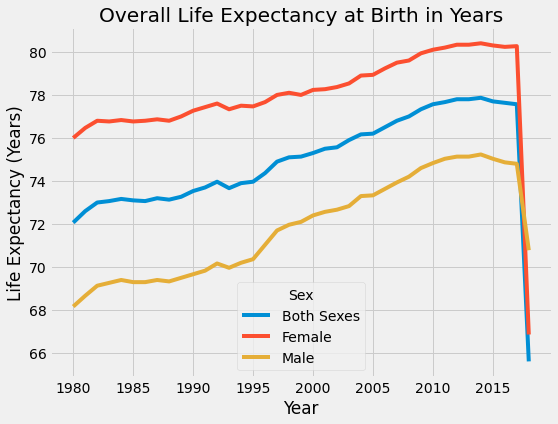

In [16]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(8,6))
    
    (le
         .pivot_table(index='Year',
                      columns='Sex',
                      values='Avg_life_expectancy')
         .loc[1980:]
         .plot(ax=ax)
    )
    
    ax.set_ylabel('Life Expectancy (Years)')
    ax.set_title('Overall Life Expectancy at Birth in Years')
    
plt.savefig('Life Expectancy.jpg')